<a href="https://colab.research.google.com/github/As2909/Pytorch-Zero-To-Mastery/blob/main/Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn # nn contains all Pytorch's buliding blocks for
import matplotlib.pyplot as plt


In [ ]:
torch.__version__

'2.3.0+cu121'

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
split_data = int(0.8 * len(X))
X_train, y_train = X[:split_data], y[:split_data]
X_test, y_test = X[split_data:], y[split_data:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  plt.figure(figsize=(10, 7))

  #plotting training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training_data")

  #plotting testing_data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing_data")

  # Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 12})

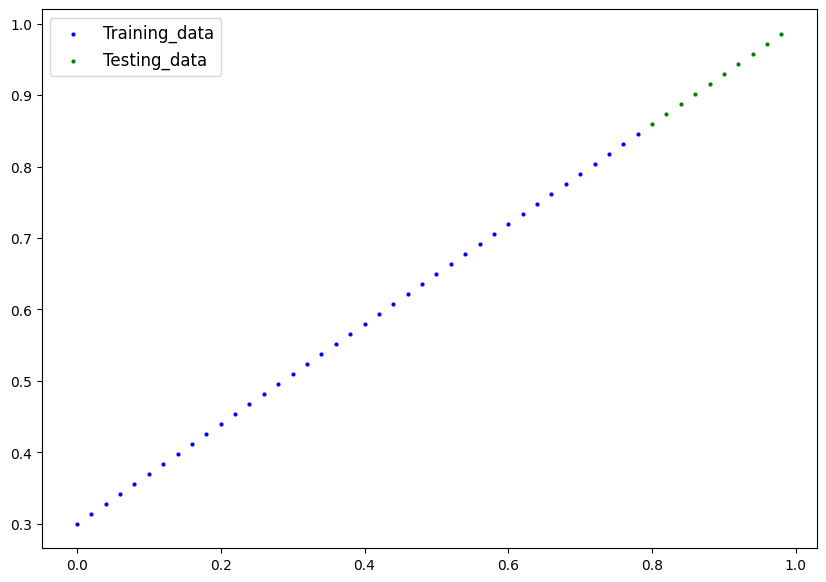

In [ ]:
plot_predictions();

In [ ]:
# create linear regression model class
class LinearRegressinModelV2(nn.Module): # almost everthing in pytorch inherits from nn.module
  def __init__(self):
    super().__init__()
    # Intialize Model Parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float32))

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
### Pytorch model building essentials
# * torch.nn - contains all of the building blocks for computational graphs
# * torch.optim - contains various optimization algorithms
# * torch.nn.functional -

In [ ]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.module)
model_O = LinearRegressinModelV2()

# check out the parameters

list(model_O.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_O.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
### Making prediction using "torh.infernce_mode()"
with torch.inference_mode():
  y_preds = model_O(X_test)

y_preds

#with torch.no_grad():
#  y_preds = model_O(X_test)

#y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

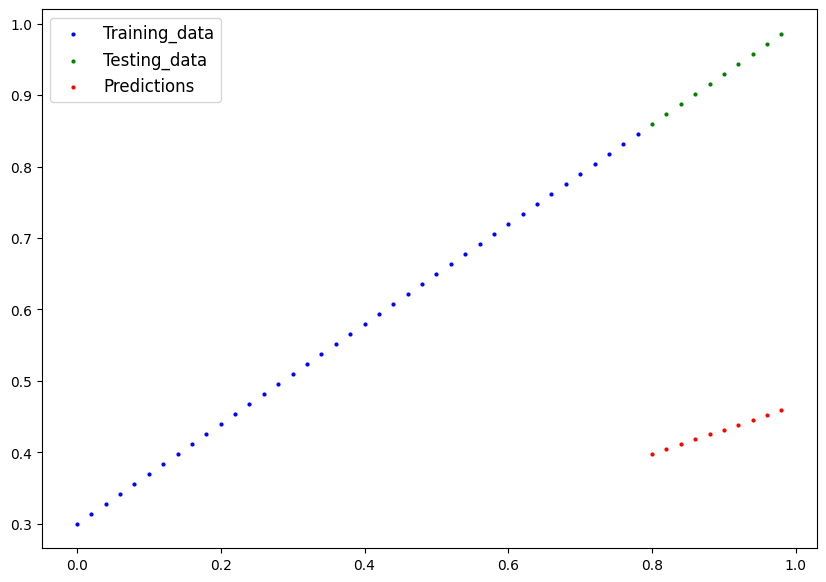

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
list(model_O.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_O.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

#Steup an optimizer
optimizer = torch.optim.SGD(params=model_O.parameters(),
                             lr=0.01)

In [ ]:
list(model_O.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
## Building a training loop
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []
for epoch in range(epochs):
  model_O.train()
  y_pred = model_O(X_train)

  loss = loss_fn(y_pred, y_train)
  loss_values.append(loss)

  epoch_count.append(epoch)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_O.eval()
  with torch.inference_mode():
    test_pred = model_O(X_test)
    test_loss = loss_fn(test_pred, y_test)
    test_loss_values.append(test_loss)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

In [ ]:
model_O.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with torch.inference_mode():
  y_pred_new = model_O(X_test)
y_pred_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

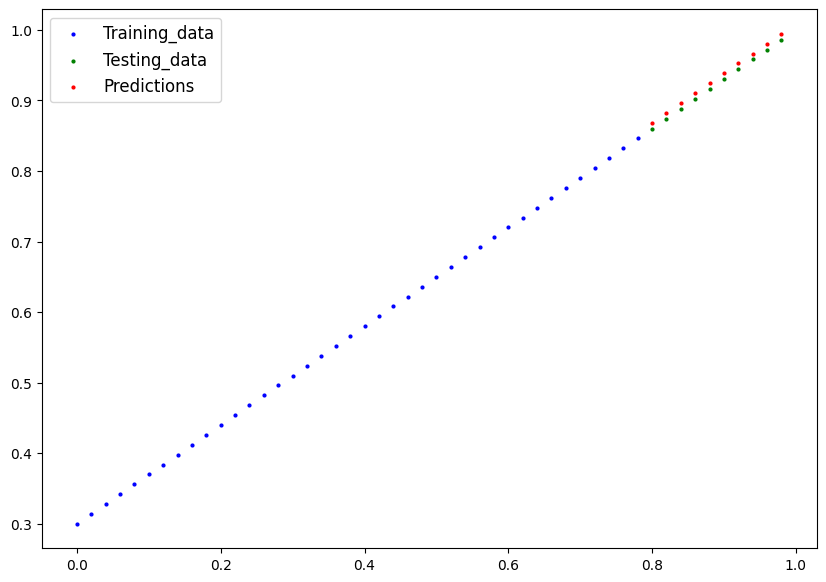

In [ ]:
plot_predictions(predictions=y_pred_new)

In [ ]:
import numpy as np

np.array(torch.tensor(loss_values).cpu().numpy())

array([0.31288138, 0.30136034, 0.28983936, 0.27831835, 0.26679736,
       0.25527635, 0.24375534, 0.23223433, 0.22071333, 0.20919232,
       0.19767132, 0.18615034, 0.17462933, 0.16310832, 0.15158734,
       0.14006636, 0.12854536, 0.11702438, 0.10609122, 0.09681284,
       0.08908726, 0.08227583, 0.07638873, 0.07160007, 0.06747635,
       0.06395438, 0.06097005, 0.05845819, 0.05635259, 0.05458578,
       0.05314853, 0.05181945, 0.05069301, 0.04982285, 0.04895269,
       0.04819351, 0.04753182, 0.04692793, 0.04642332, 0.04591871,
       0.04543797, 0.04503796, 0.04463796, 0.04423796, 0.04383796,
       0.04343796, 0.04307463, 0.04272563, 0.04237663, 0.04202763,
       0.04167863, 0.04132963, 0.04098063, 0.04063163, 0.04028264,
       0.03993364, 0.03958464, 0.03923564, 0.03888664, 0.03853764,
       0.03818933, 0.03785244, 0.03750344, 0.03716412, 0.03681822,
       0.03647511, 0.03613304, 0.0357861 , 0.03544784, 0.03509884,
       0.0347609 , 0.03441364, 0.03407188, 0.03372844, 0.03338

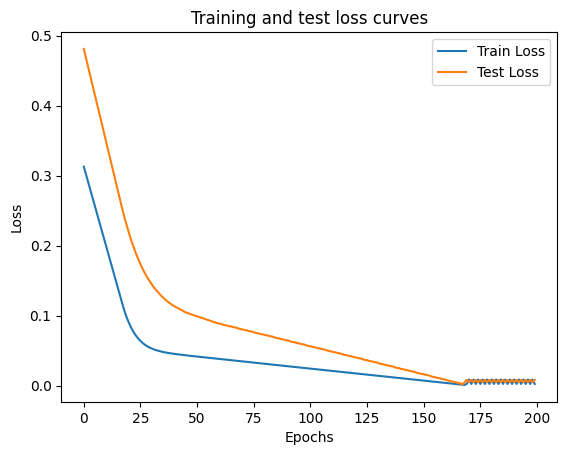

In [ ]:
plt.plot(epoch_count, torch.tensor(loss_values), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_worflow_model_class.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_O.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_worflow_model_class.pth


In [ ]:
#torch.save(obj=model_O.state_dict(), f=MODEL_SAVE_PATH)

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1698 Jul  1 11:02 01_pytorch_worflow_model_class.pth


In [ ]:
model_O.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
model_O_loaded = LinearRegressinModelV2()
model_O_loaded.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
model_O_loaded.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
model_O_loaded.eval()
with torch.inference_mode():
  y_pred_loaded = model_O_loaded(X_test)

y_pred_loaded

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_pred_new == y_pred_loaded

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# create some data usinfg linear regression
weight , bias


(0.7, 0.3)

**Extra curriculum**

In [ ]:
w = 0.3
b = 0.9
X = torch.arange(start=0, end=1000, step=2).unsqueeze(dim=1)
y = w * X + b
X[:10], y[:10]

(tensor([[ 0],
         [ 2],
         [ 4],
         [ 6],
         [ 8],
         [10],
         [12],
         [14],
         [16],
         [18]]),
 tensor([[0.9000],
         [1.5000],
         [2.1000],
         [2.7000],
         [3.3000],
         [3.9000],
         [4.5000],
         [5.1000],
         [5.7000],
         [6.3000]]))

In [ ]:
split_data = int(0.8 * len(X))
X_train , y_train = X[:split_data], y[:split_data]
X_test, y_test = X[split_data:], y[split_data:]
len(X_train), len(y_train), len(X_test), len(y_test)

(400, 400, 100, 100)

In [ ]:
def plot_data(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  plt.figure(figsize=(10, 6))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training_data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing_data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size":12})

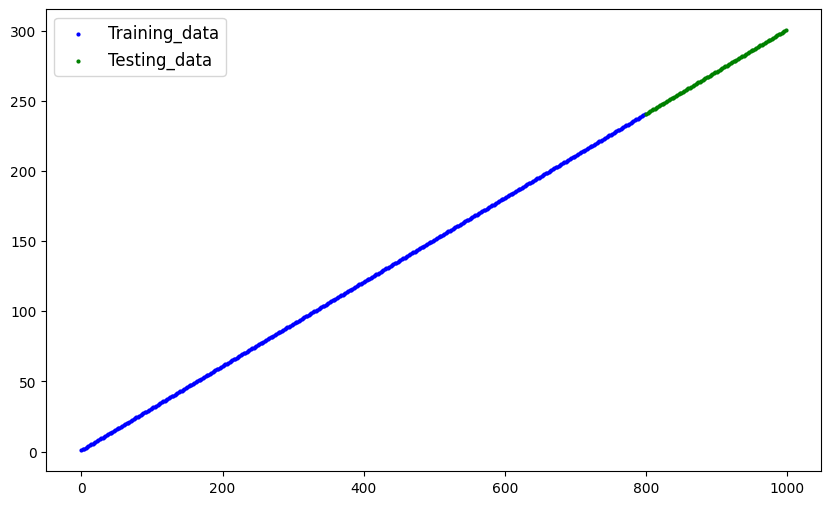

In [ ]:
plot_data()

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

  def forward(self, x:torch.tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
torch.manual_seed(45)

lr = LinearRegression()
lr.state_dict()

OrderedDict([('weights', tensor([-1.1224])), ('bias', tensor([0.0312]))])

In [ ]:
with torch.inference_mode():
  y_pred = lr(X_test)
y_pred[:10]

tensor([[-897.8663],
        [-900.1111],
        [-902.3558],
        [-904.6006],
        [-906.8453],
        [-909.0901],
        [-911.3348],
        [-913.5795],
        [-915.8243],
        [-918.0690]])

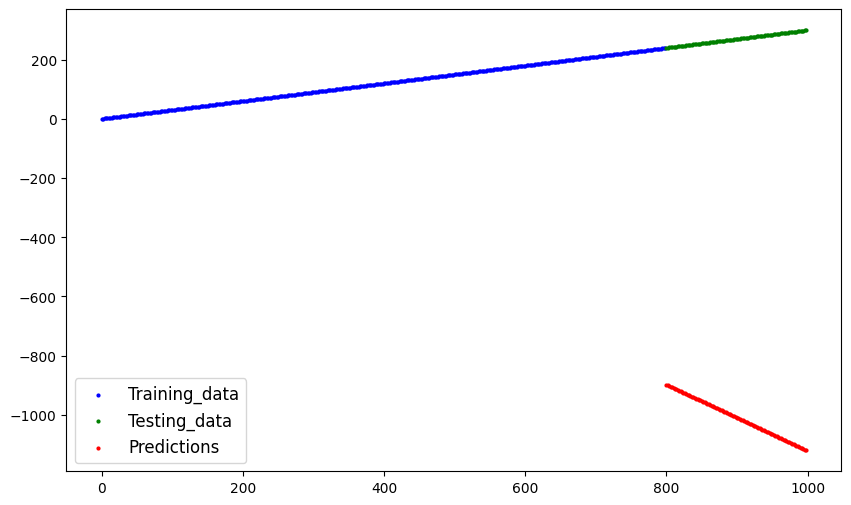

In [ ]:
plot_data(predictions=y_pred)

In [ ]:
loss_l1 = nn.L1Loss()
optimizer = torch.optim.Adam(params=lr.parameters(), lr=0.01)

In [ ]:
list(lr.parameters())

[Parameter containing:
 tensor([-1.1224], requires_grad=True),
 Parameter containing:
 tensor([0.0312], requires_grad=True)]

In [ ]:
torch.manual_seed(45)
epochs = 600
epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
  lr.train()
  y_pred = lr(X_train)
  loss = loss_l1(y_pred, y_train)
  epoch_count.append(epoch)
  train_loss_values.append(loss)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  lr.eval()
  with torch.no_grad():
      test_pred = lr(X_test)
      test_loss = loss_l1(test_pred, y_test)
      test_loss_values.append(test_loss)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Train Loss : {loss} | Test Loss: {test_loss}")



Epoch: 0 | Train Loss : 568.3952026367188 | Test Loss: 1270.581298828125
Epoch: 100 | Train Loss : 168.3965301513672 | Test Loss: 370.5823059082031
Epoch: 200 | Train Loss : 0.5100334286689758 | Test Loss: 0.06575042754411697
Epoch: 300 | Train Loss : 0.5318871736526489 | Test Loss: 1.8643831014633179
Epoch: 400 | Train Loss : 0.7864398956298828 | Test Loss: 1.3810304403305054
Epoch: 500 | Train Loss : 0.5943301320075989 | Test Loss: 0.7474615573883057


In [ ]:
lr.state_dict()

OrderedDict([('weights', tensor([0.3006])), ('bias', tensor([0.9014]))])

In [ ]:
with torch.inference_mode():
  y_pred_new = lr(X_test)
y_pred_new[:10]

tensor([[241.3549],
        [241.9561],
        [242.5572],
        [243.1584],
        [243.7595],
        [244.3606],
        [244.9617],
        [245.5629],
        [246.1640],
        [246.7652]])

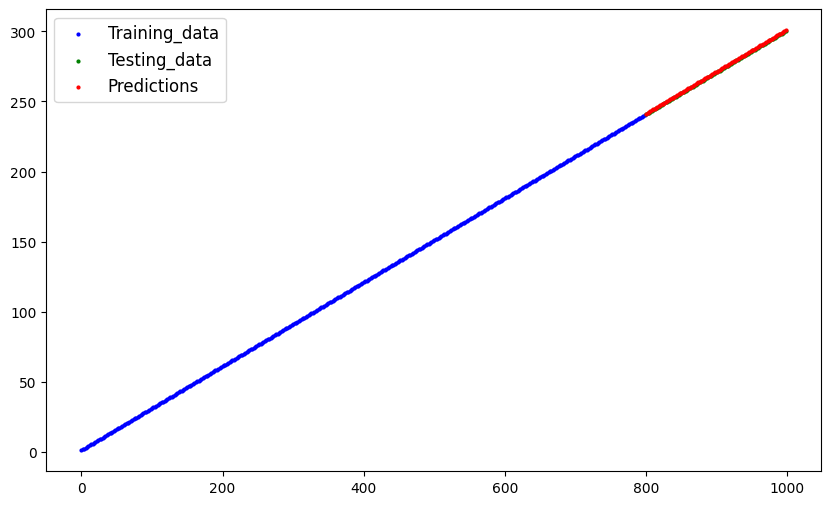

In [ ]:
plot_data(predictions=y_pred_new)

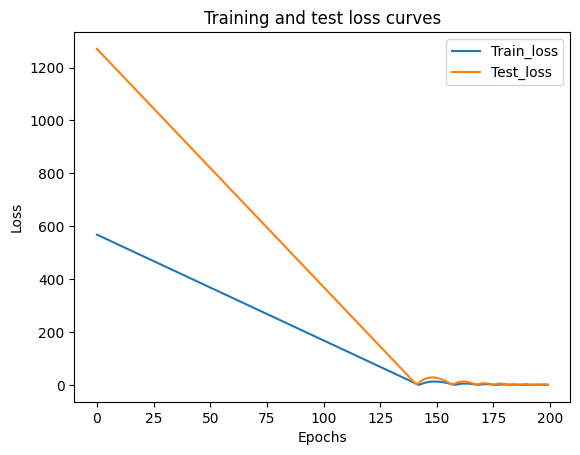

In [ ]:
plt.plot(epoch_count[:200], torch.tensor(train_loss_values[:200]), label="Train_loss")
plt.plot(epoch_count[:200], test_loss_values[:200], label="Test_loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
class LinearRegressionV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1,
                            out_features=1,
                            dtype=torch.float32)

  def forward(self, x:torch.tensor) -> torch.Tensor:
    return self.linear(x)


In [ ]:
torch.manual_seed(24)

model_1 = LinearRegressionV3()
model_1.state_dict()

OrderedDict([('linear.weight', tensor([[0.5289]])),
             ('linear.bias', tensor([-0.2499]))])

In [ ]:
model_1

LinearRegressionV3(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr = 0.01)


In [ ]:
list(model_1.parameters())

[Parameter containing:
 tensor([[0.2997]], requires_grad=True),
 Parameter containing:
 tensor([0.8995], requires_grad=True)]

In [ ]:
X_train = X_train.float()
X_test = X_test.float()
y_train = y_train.float()
y_test = y_test.float()

In [ ]:
torch.manual_seed(24)
epochs = 200

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    y_test_pred = model_1(X_test)
    test_loss = loss_fn(y_test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Loss: 0.10306183993816376 | Test loss: 8.768401145935059
Epoch: 10 | Loss: 0.1112377941608429 | Test loss: 1.3127870559692383
Epoch: 20 | Loss: 1.166957139968872 | Test loss: 1.5307981967926025
Epoch: 30 | Loss: 0.45487603545188904 | Test loss: 0.15107375383377075
Epoch: 40 | Loss: 0.18906550109386444 | Test loss: 1.1338911056518555
Epoch: 50 | Loss: 0.6777691841125488 | Test loss: 2.117166519165039
Epoch: 60 | Loss: 0.3788365423679352 | Test loss: 0.2932894825935364
Epoch: 70 | Loss: 0.7731944918632507 | Test loss: 0.5064297318458557
Epoch: 80 | Loss: 0.18758472800254822 | Test loss: 0.36155030131340027
Epoch: 90 | Loss: 0.6680834889411926 | Test loss: 2.411668062210083
Epoch: 100 | Loss: 0.07416865974664688 | Test loss: 0.9085534811019897
Epoch: 110 | Loss: 1.0350459814071655 | Test loss: 1.3546781539916992
Epoch: 120 | Loss: 0.43381744623184204 | Test loss: 0.13720688223838806
Epoch: 130 | Loss: 0.18771769106388092 | Test loss: 1.1213990449905396
Epoch: 140 | Loss: 0.6746

In [ ]:
model_1.state_dict()

OrderedDict([('linear.weight', tensor([[0.3026]])),
             ('linear.bias', tensor([0.9025]))])

In [ ]:
w, b

(0.3, 0.9)